In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv("mail_data (2).csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Convert spam/ham into 1 and 0
data['Category'] = data['Category'].map({'spam':1, 'ham':0})

# Handle missing values
data['Message'] = data['Message'].fillna("")

X = data['Message']
y = data['Category']

print("Dataset Shape:", data.shape)
print(data['Category'].value_counts())

Dataset Shape: (5572, 2)
Category
0    4825
1     747
Name: count, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (4457,)
Testing size: (1115,)


In [6]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_train_features, y_train)

MultinomialNB()

In [8]:
y_pred = model.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9766816143497757


Confusion Matrix:
 [[966   0]
 [ 26 123]]


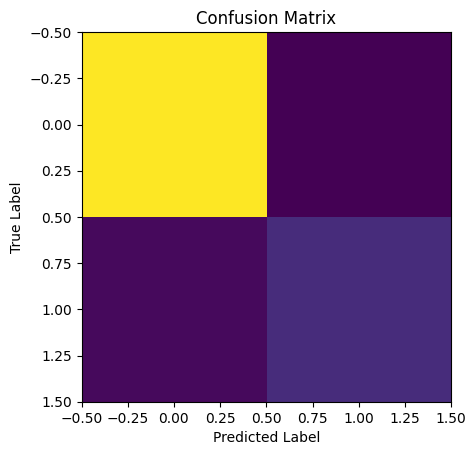

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

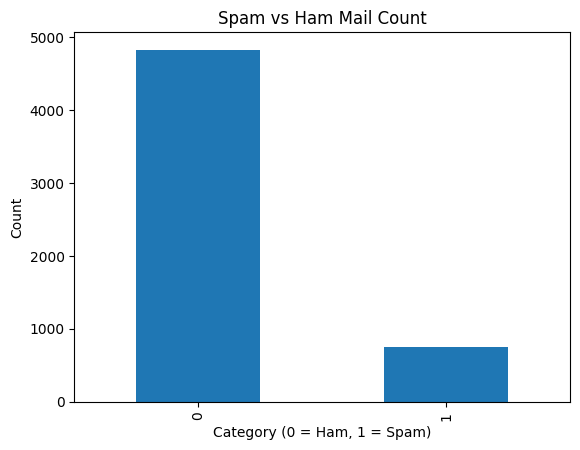

In [10]:
plt.figure()
data['Category'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Mail Count")
plt.xlabel("Category (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

In [11]:
input_mail = ["Free lottery ticket! Claim your prize now."]
input_features = vectorizer.transform(input_mail)

prediction = model.predict(input_features)

if prediction[0] == 1:
    print("The message is SPAM")
else:
    print("The message is NOT SPAM")

The message is SPAM
